In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0-alpha0'

In [3]:
import tensorflow.keras.layers as tkl
import tensorflow.keras as tk
import tensorflow as tf
import os
import numpy as np

In [4]:
from datetime import datetime
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tk.callbacks.TensorBoard(log_dir=logdir)
os.mkdir(logdir)

In [5]:
n_history=7
n_market=2
n_portfolio=3

In [6]:
def create_convnet_actor(n_filters, n_history, n_market, n_portfolio):
    inputs = tk.Input(shape=[n_history,n_market,1])
    conv = tkl.Conv2D(activation=None, filters=n_filters, padding='valid', kernel_size=[n_history,n_market])
    reshape = tkl.Reshape([n_filters])    
    hidden1 = tkl.Dense(units=16, activation='relu')
    hidden2 = tkl.Dense(units=8, activation='relu')
    out = tkl.Dense(units=n_portfolio, activation='softmax')

    model = tk.Model(inputs, out(hidden2(hidden1(reshape(conv(inputs))))))
    return model

actor = create_convnet_actor(n_filters = 10, n_history=7, n_market=2, n_portfolio=3)

In [7]:
actor.compile('sgd', 'mse')

In [8]:
train_x = np.random.random([10000,7,2,1]).astype(np.float32)

In [9]:
def heuristic_hold(x):
    batch_size = len(x)
    x1 = np.squeeze(x)
    diffs = x1[:,-1,:] - x1[:,0,:]
    diffs_and_cash = np.hstack([np.zeros([batch_size, 1], dtype=np.float32), diffs])
    max_diffs = np.max(diffs_and_cash, axis=-1)
    labels = ((diffs_and_cash - max_diffs.reshape([batch_size,1])) == 0).astype(np.float32)
    return labels

In [10]:
train_y = heuristic_hold(train_x)

In [11]:
eval_x = np.random.random([100, n_history, n_market, 1]).astype(np.float32)
eval_y = heuristic_hold(eval_x)

In [12]:
len(train_x)

10000

In [13]:
history = actor.fit(train_x, train_y, epochs=300, verbose=0,
         #batch_size=len(train_x), 
         validation_data=(eval_x, eval_y))

In [14]:
actor(eval_x)[5]

<tf.Tensor: id=570057, shape=(3,), dtype=float32, numpy=array([0.8245767 , 0.00125757, 0.17416574], dtype=float32)>

In [15]:
eval_x[5].T

array([[[0.77408046, 0.905587  , 0.11402998, 0.23880549, 0.04325306,
         0.90929407, 0.15431118],
        [0.14915402, 0.91318536, 0.11082466, 0.46889502, 0.66625994,
         0.42866525, 0.04045654]]], dtype=float32)

In [16]:
eval_y[5]

array([1., 0., 0.], dtype=float32)

In [17]:
history

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

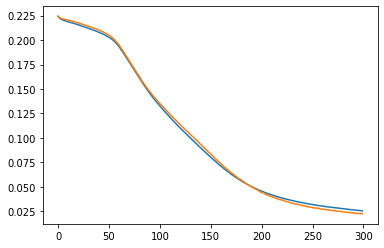

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [20]:
history.history

{'loss': [0.22421936292648315,
  0.222893718791008,
  0.22197340562343598,
  0.22128724002838135,
  0.22074164094924928,
  0.22029384269714355,
  0.21991572687625885,
  0.21957920789718627,
  0.21926484577655792,
  0.21896595640182495,
  0.21867407174110412,
  0.21838522782325745,
  0.21809626393318177,
  0.21780625824928285,
  0.2175102463722229,
  0.2172051968574524,
  0.2168925633430481,
  0.21657288477420808,
  0.21624322690963746,
  0.2159024836540222,
  0.21555454363822937,
  0.21519978823661803,
  0.21484015431404113,
  0.2144810787677765,
  0.21412108435630797,
  0.21375901441574097,
  0.2133958502292633,
  0.21303343262672425,
  0.21267074818611145,
  0.21230694479942322,
  0.2119416846513748,
  0.21157223041057588,
  0.21120127272605896,
  0.21082419714927672,
  0.2104437532901764,
  0.21005826501846314,
  0.20966589765548707,
  0.2092667157649994,
  0.2088591525554657,
  0.20844170055389405,
  0.2080131232738495,
  0.2075725187778473,
  0.2071171362400055,
  0.20664772791862